# Visualize cosmologic data

#### Index<a name="index"></a>
1. [Import packages](#imports)
* [Train data](#train)
    1. [Load data](#loadTrainData)
    * [Plot data](#plotTrainData)
* [Train data](#test)
    1. [Load data](#loadTestData)
    * [Plot data](#plotTestData)

## 1. Import packages<a name="imports"></a>

In [1]:
import numpy as np
import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'large',
          'figure.figsize': (5, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

## 2. Train data<a name="train"></a>

### 2.1. Load data<a name="loadTrainData"></a>

We can read in our training data from a `.pickle` file:

In [2]:
path_train = '../data/cosmology_train_small.pickle'
with open(path_train, 'rb') as input_file:
    data_train = pickle.load(input_file)

The file is saved as an array of dictionaries that have input parameters, output statistics, and extra parameters used to generate the output statistics.

In [3]:
input_train = data_train['input_data']
number_train = input_train.shape[0]
print("Number of datapoints:", number_train)

Number of datapoints: 64


The cosmology dataset contains cosmological parameters ($\Omega_m$, $\sigma_8$, $\Omega_b$) as inputs, and the correlation function as output. The correlation function is measured at 10 separation values $r$.

In [4]:
output_train = data_train['output_data']
r_vals = np.linspace(50, 140, 10)
print("Number of input parameters:", input_train.shape[1]-1)  # remove the `object_id` column
print("Number of output values:", output_train.shape[1]-1)  # remove the `object_id` column

Number of input parameters: 3
Number of output values: 10


## 2.2. Plot data<a name="plotTrainData"></a>

We can plot our training set of statistics:

Text(0, 0.5, '$\\xi(r)$')

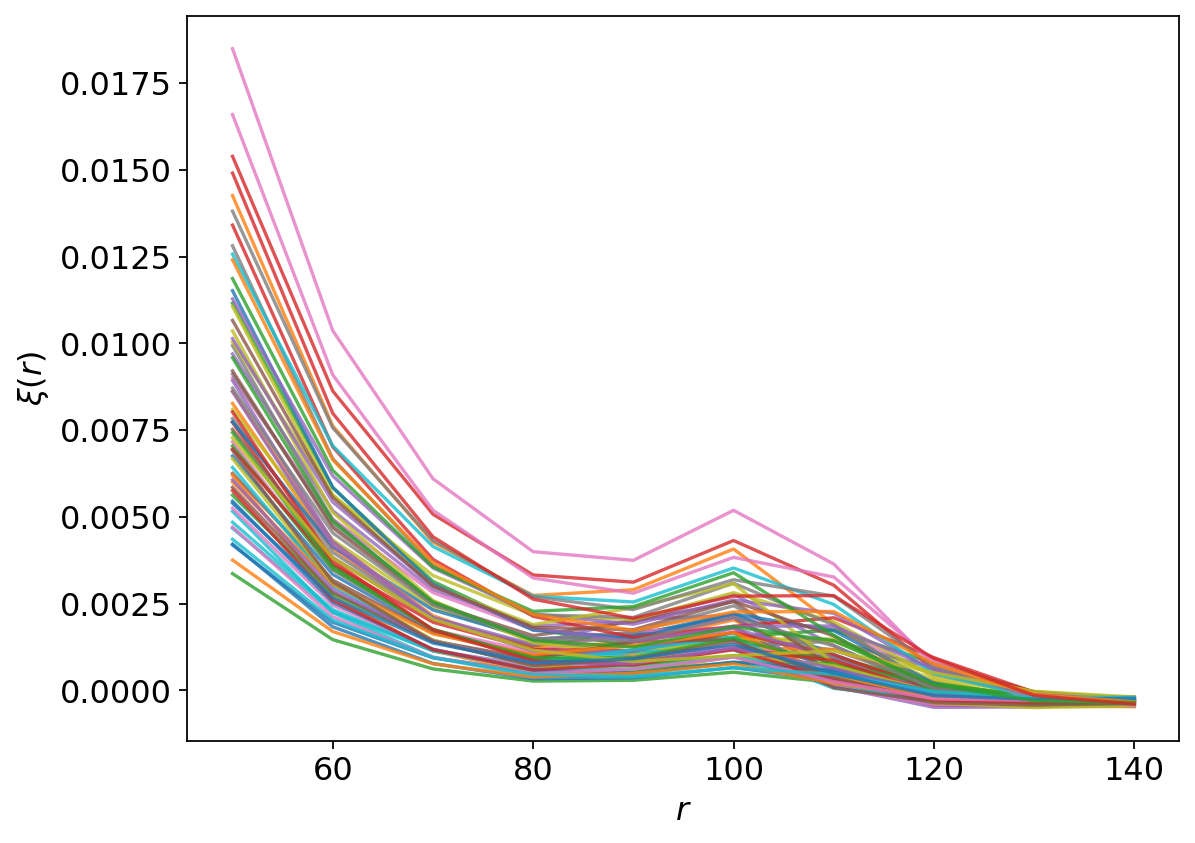

In [5]:
extra_train = data_train['extra_input']
r_vals = extra_train['r_vals']
ys_train_plot = output_train.copy()
ys_train_plot = ys_train_plot.drop(columns=['object_id'])
ys_train_plot = ys_train_plot.sample(frac=1)

plt.figure(figsize=(8,6))
for i in np.arange(len(ys_train_plot)):
    plt.plot(r_vals, ys_train_plot.iloc[i], alpha=0.8)
plt.xlabel('$r$')
plt.ylabel(r'$\xi(r)$')

## 3. Test data<a name="test"></a>

Let's do the same for our test set:

### 3.1. Load data<a name="loadTestData"></a>

In [6]:
path_test = '../data/cosmology_test_small.pickle'
with open(path_test, 'rb') as input:
    data_test = pickle.load(input)

In [7]:
input_test = data_test['input_data']
number_test = input_test.shape[0]
print("Number of datapoints:", number_test)

Number of datapoints: 10


In [8]:
output_test = data_test['output_data']
r_vals = np.linspace(50, 140, 10)
print("Number of input parameters:", input_test.shape[1]-1)  # remove the `object_id` column
print("Number of output values:", output_test.shape[1]-1)  # remove the `object_id` column

Number of input parameters: 3
Number of output values: 10


Text(0, 0.5, '$\\xi(r)$')

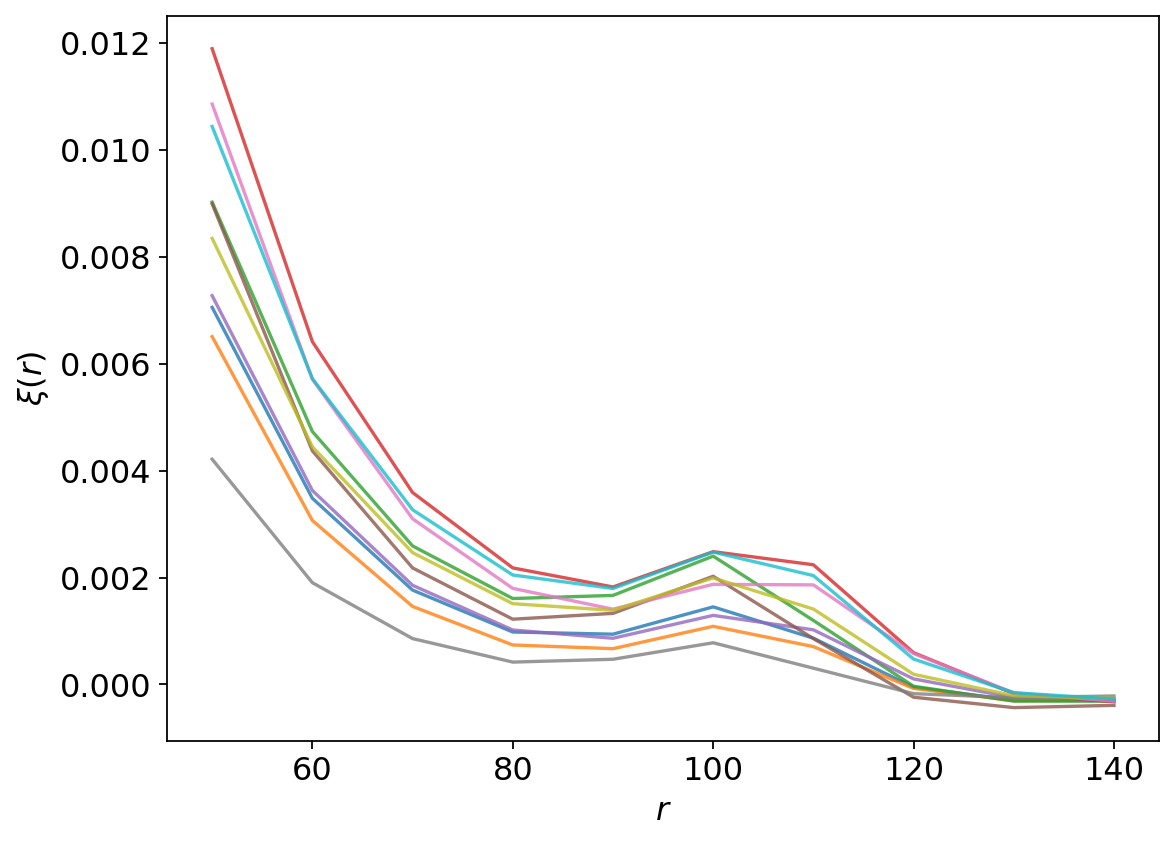

In [9]:
extra_test = data_test['extra_input']
r_vals = extra_test['r_vals']
ys_test_plot = output_test.copy()
ys_test_plot = ys_test_plot.drop(columns=['object_id'])
ys_test_plot = ys_test_plot.sample(frac=1)

plt.figure(figsize=(8,6))
for i in np.arange(len(ys_test_plot)):
    plt.plot(r_vals, ys_test_plot.iloc[i], alpha=0.8)
plt.xlabel('$r$')
plt.ylabel(r'$\xi(r)$')

We can also check out the parameter space. We plot the testing and training points used:

TODO!